In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
#Loading locational dataset
df = pd.read_csv('paperdata.csv', index_col ='Code')
df.head(20)

,Country,Q1T,Q2T,Q3T,Q4T,Q1P,Q2P,Q3P,Q4P,Forest LU,AgLU,Biomass availability,Water availability,Geological storage potential,GNI per capita,Low carbon energy
Code,,,,,,,,,,,,,,,,
AFG,Afghanistan,0.4878,0.5549,0.5705,0.5174,0.1298,0.0806,0.0148,0.0415,0.0349,0.0743,0.0009,0.50,0.50,0.0423,0.7857
ALB,Albania,0.4893,0.4274,0.4799,0.5219,0.2301,0.2338,0.1197,0.2832,0.0015,0.0023,0.0015,1.00,0.50,0.4164,1.0000
DZA,Algeria,0.7189,0.8211,0.8432,0.7748,0.0195,0.0109,0.0100,0.0163,0.0395,0.0812,0.0009,0.00,1.00,0.3199,0.0102
AND,Andorra,0.4597,0.2967,0.3640,0.4656,0.1539,0.2778,0.1454,0.1743,0.0000,0.0000,0.0000,1.00,0.50,1.0000,0.3800
AGO,Angola,0.8745,0.6108,0.4739,0.8841,0.3778,0.1257,0.0170,0.2911,0.1240,0.1161,0.0937,1.00,0.50,0.2369,0.7084
ATG,Antigua and Barbuda,0.9237,0.7996,0.7089,0.9686,0.3167,0.5944,0.4893,0.6597,0.0000,0.0000,0.0000,1.00,0.00,1.0000,0.0294
ARG,Argentina,0.8158,0.3098,0.1386,0.7594,0.1717,0.1244,0.0503,0.1418,0.1535,0.2891,0.0470,1.00,0.50,0.8878,0.3115
ARM,Armenia,0.3186,0.3251,0.4238,0.3686,0.0759,0.2378,0.0865,0.0721,0.0017,0.0033,0.0006,0.50,0.00,0.3733,0.5978
AUS,Australia,0.9633,0.5440,0.3658,0.9406,0.1919,0.0734,0.0376,0.0893,0.5761,0.7966,0.0855,1.00,1.00,1.0000,0.2972


In [3]:
df.columns

Index(['Country', 'Q1T', 'Q2T', 'Q3T', 'Q4T', 'Q1P', 'Q2P', 'Q3P', 'Q4P',
       'Forest LU', 'AgLU', 'Biomass availability', 'Water availability',
       'Geological storage potential', 'GNI per capita', 'Low carbon energy '],
      dtype='object')

In [4]:
# Using the elbow method to determine the k value to be applied
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df[['Water availability','Geological storage potential','Low carbon energy ','GNI per capita']])
    sse.append(km.inertia_)

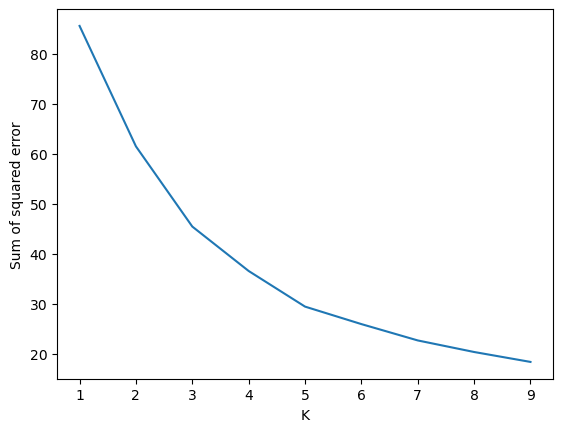

In [5]:
# Plot to obtain elbow
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [6]:
# create clusters using k value = 5
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

In [7]:
# Determining mean cluster characterisitics
y_hc = hc.fit_predict(df[['Water availability','Geological storage potential','Low carbon energy ','GNI per capita']])
df['cluster'] = y_hc
df.sort_values("cluster", inplace = True, ascending=True)

#average input vars by cluster
df_cluster = df.groupby('cluster').mean()

/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/var/folders/bn/jw4b363n6cz8jy9jwmhp7q0c0000gn/T/ipykernel_82197/2895682765.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cluster = df.groupby('cluster').mean()


<Axes: ylabel='cluster'>

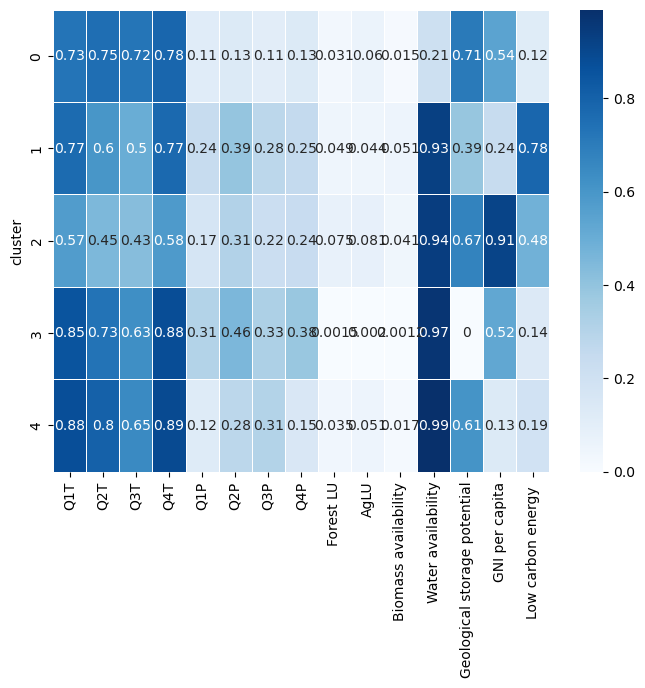

In [8]:
#Heatmap of cluster characteristics
plt.figure(figsize=(8,6))
sns.heatmap(df_cluster, annot=True, cmap="Blues", linewidths=.5)

In [9]:
# see how clusters are distributed
df['cluster'].value_counts()

2    59
1    42
0    32
4    25
3    24
Name: cluster, dtype: int64

In [10]:
df.shape

(182, 17)

In [11]:
# Notes: 

# The paper only used 'Water availability','Geological storage potential','Low carbon energy ','GNI per capita' to cluster
# Clusters were not based on temp, precip, or land availability variables. Need to explore why.

# Their code originally broke it into 5 clusters ... why did they switch to 4 for the report?

# Water availability is a huge determining factor- we need this if possible!

# they had more data than I thought- 182 countries to train with. We have less than half of that. Not great.